<center><h1 style="font-size:2em;color:#2467C0"><h1 style="font-size:2em;color:#2467C0">Processamento e tratamento dos dados</h1>

## Objetivo deste estudo: 

* O intuito deste notebook é apresentar de forma clara e sucinta o processamento e os tratamentos orientados aos dados, tratamentos esses que irão partir dos princípios:

* Summary da base; 

* Saída de uma base CSV;

## Importar bibliotecas
<br> Começaremos importando as bibliotecas Python que usaremos nesta análise. Essas bibliotecas incluem:
<ul>
<li> <b> pandas </b> e <b> numpy </b> para ingestão e manipulação de dados. </li>
<li> <b> missingno </b> grafico dos valores ausentes </li>
<li> <b> pandas_profiling </b> para visualização de dados </li>
<li> <b> preprocessing </b> para conversão de variáveis categoricas </li>
</ul>

In [1]:
# Bibliotecas para criação e manipulação de DATAFRAMES e Algebra 
import pandas as pd 
import numpy as np

# Bibliotecas para geração de gráficos
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt

# Análise exploratória Pandas
import pandas_profiling as pp

# Bibliotecas para execução das transformações dos dados
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

* Carregando os dados .csv

* Agora, precisaremos ler o conjunto de dados usando os comandos abaixo.

In [2]:
# Carregando os dados
data=pd.read_csv('data_ptd.csv', sep=';')
print ('O dataset tem %s linhas e %s colunas' % (data.shape[0], data.shape[1]))

O dataset tem 53257 linhas e 47 colunas


Iniciaremos gerando overview simples dos dados.
<br> <br>
Vamos ver a tipagem dos dados, numero de amostras e colunas, usando um atributo do pandas.

<h6>Overview da base

In [8]:
data.head(100)

,id_contact,regional,idade_cliente,plan_type,Qnt_abandono,sum_recharge,recharge_frequency,rec_online_10,rec_online_35_b5,rec_online_15,...,prezao_mensal,prezao_quinzenal,prezao_semanal,recarga_sos,servicos_operadora,sms_cobrar,sms_internacional,transf_entre_regionais,truecaller,venda
0,22817382,BASE,46,CONTROLE,1.0,40.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,1
1,69552265,SP,36,CONTROLE,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,82039703,NO,-1,PRE PAGO,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,82031014,RS,26,PRE PAGO,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,69479552,NO,51,POS PAGO,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,82019254,RS,27,CONTROLE,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
96,80980364,CO,27,PRE PAGO,2.0,45.0,4.0,0.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
97,82015251,NE,37,PRE PAGO,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
98,80549154,NO,75,PRE PAGO,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [6]:
data.tail(100)

,id_contact,regional,idade_cliente,plan_type,Qnt_abandono,sum_recharge,recharge_frequency,rec_online_10,rec_online_35_b5,rec_online_15,...,prezao_mensal,prezao_quinzenal,prezao_semanal,recarga_sos,servicos_operadora,sms_cobrar,sms_internacional,transf_entre_regionais,truecaller,venda
53157,83389153,NO,36,CONTROLE,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
53158,83389156,SP,-1,PRE PAGO,1.0,40.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
53159,83389157,NE,39,CONTROLE,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
53160,23298263,CO,27,PRE PAGO,1.0,85.0,5.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0
53161,12964046,RJES,47,CONTROLE,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53252,83389303,NO,-1,PRE PAGO,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
53253,22684358,SP,39,CONTROLE,1.0,40.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
53254,78025060,SP,38,PRE PAGO,1.0,105.0,3.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
53255,5586375,SP,40,POS PAGO,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
# Informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53257 entries, 0 to 53256
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_contact              53257 non-null  int64  
 1   regional                53257 non-null  object 
 2   idade_cliente           53257 non-null  int64  
 3   plan_type               53257 non-null  object 
 4   Qnt_abandono            53257 non-null  float64
 5   sum_recharge            17061 non-null  float64
 6   recharge_frequency      17061 non-null  float64
 7   rec_online_10           17061 non-null  float64
 8   rec_online_35_b5        17061 non-null  float64
 9   rec_online_15           17061 non-null  float64
 10  sos_rec_5               17061 non-null  float64
 11  rec_online_20_b2        17061 non-null  float64
 12  chip_pre_rec_10         17061 non-null  float64
 13  chip_pre_rec_20         17061 non-null  float64
 14  rec_online_13           17061 non-null

* É possivel observar nas informações, que temos 53.256 amostras, com um total de 47 colunas

#### Resumo da base (Summary)
* Vamos ver o que as colunas usando um atributo do pandas chamado "columns".

In [4]:
# Relatório dataset
pfr = pp.ProfileReport(data, minimal=True)
pfr.to_file(output_file="descritiva.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Visualizando todas as colunas que compõe o dataframe
data.columns

Index(['id_contact', 'regional', 'idade_cliente', 'plan_type', 'Qnt_abandono',
       'sum_recharge', 'recharge_frequency', 'rec_online_10',
       'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
       'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
       'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
       'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
       'sos_rec_3', 'rec_online_8', 'sum_services', 'services_frequency',
       'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
       'clube', 'pre_mix_giga', 'entretenimento', 'games',
       'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
       'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
       'servicos_operadora', 'sms_cobrar', 'sms_internacional',
       'transf_entre_regionais', 'truecaller', 'venda'],
      dtype='object')

#### Filtrando dados ausentes

In [6]:
# Dados ausentes
data.isnull().sum()

id_contact                    0
regional                      0
idade_cliente                 0
plan_type                     0
Qnt_abandono                  0
sum_recharge              36196
recharge_frequency        36196
rec_online_10             36196
rec_online_35_b5          36196
rec_online_15             36196
sos_rec_5                 36196
rec_online_20_b2          36196
chip_pre_rec_10           36196
chip_pre_rec_20           36196
rec_online_13             36196
rec_online_50_b8          36196
rec_online_30_b4          36196
rec_online_40_b6          36196
pct_rec_1190              36196
pct_rec_690               36196
rec_online_100_b18        36196
pct_rec_sos_5             36196
sos_rec_3                 36196
rec_online_8              36196
sum_services              35757
services_frequency        35757
inter_avulsa              35757
antivirus                 35757
app_educacao              35757
app_emprego               35757
app_saude                 35757
clube   

* Variáveis enriquecidas de recarga

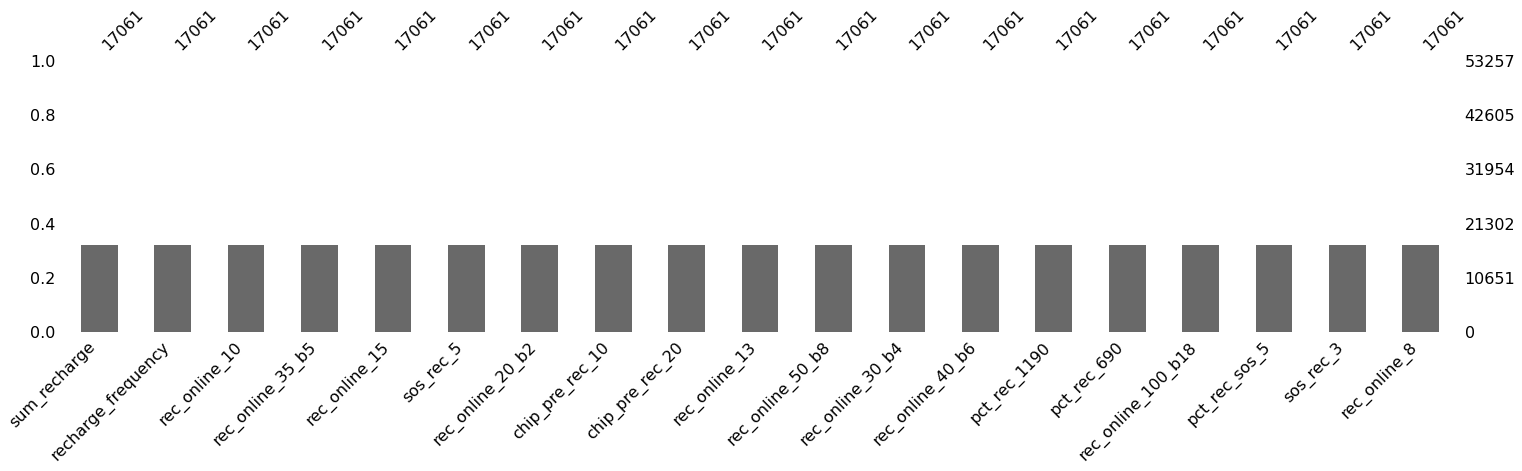

In [10]:
# Visualização dos dados ausentes
msno.bar(data.loc[:, ['sum_recharge', 'recharge_frequency', 'rec_online_10',
                      'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
                      'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
                      'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
                      'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
                      'sos_rec_3', 'rec_online_8']],figsize=(25,5));

* Variáveis enriquecidas de serviços

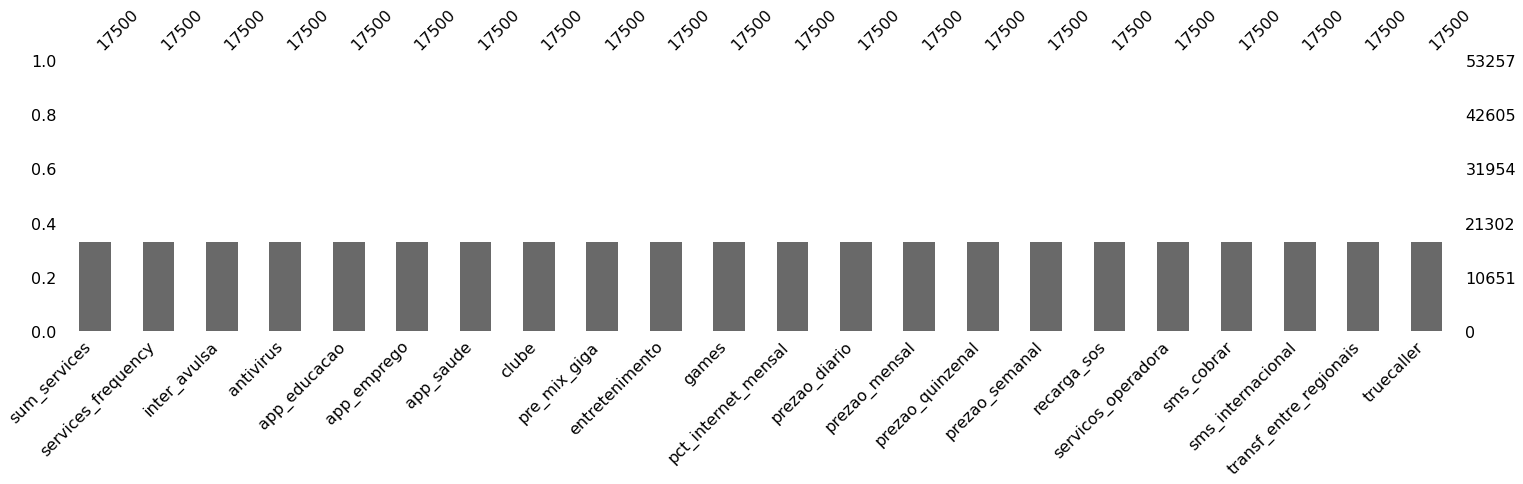

In [11]:
# Visualização dos dados ausentes
msno.bar(data.loc[:, ['sum_services', 'services_frequency',
                      'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
                      'clube', 'pre_mix_giga', 'entretenimento', 'games',
                      'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
                      'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
                      'servicos_operadora', 'sms_cobrar', 'sms_internacional',
                      'transf_entre_regionais', 'truecaller']],figsize=(25,5));

* Histograma para visualização da distribuição das variáveis de recargas

<function matplotlib.pyplot.show(close=None, block=None)>

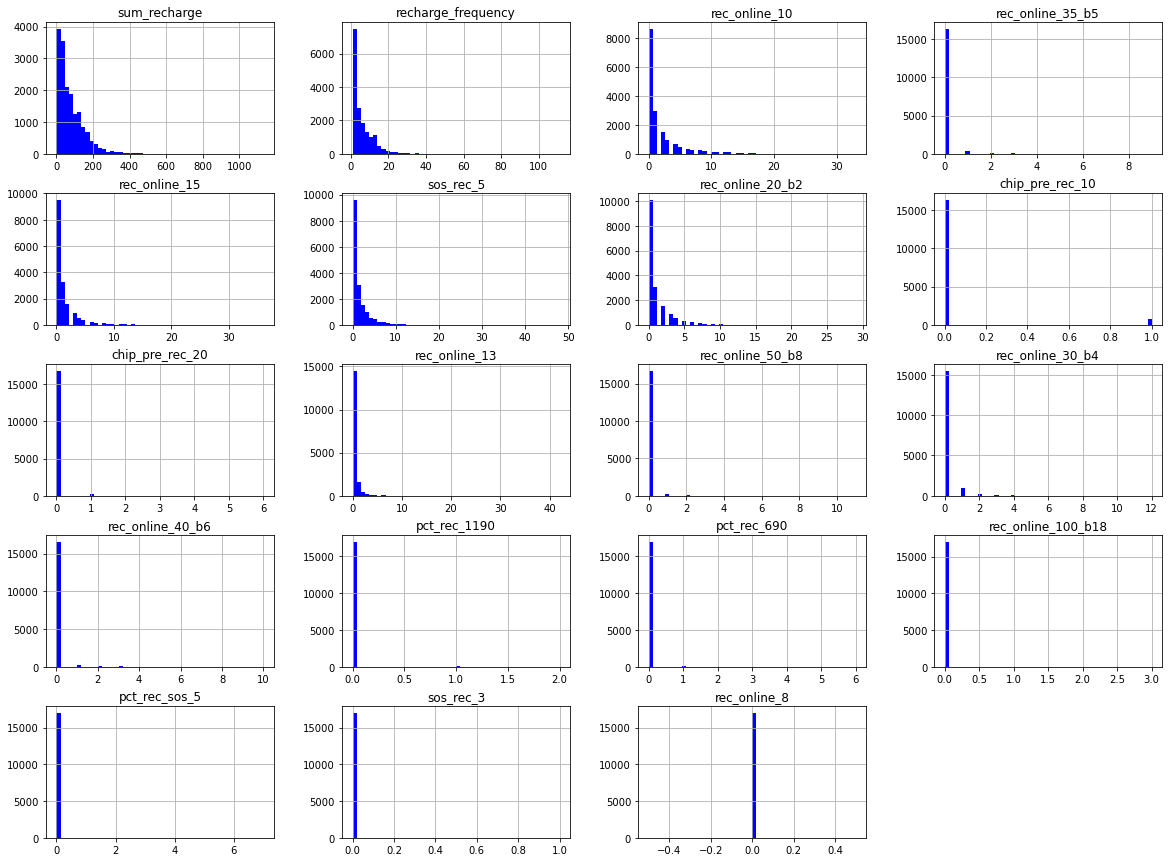

In [12]:
# Visualização da distribuição das variáveis de recargas

data.loc[:, ['sum_recharge', 'recharge_frequency', 'rec_online_10',
             'rec_online_35_b5', 'rec_online_15', 'sos_rec_5', 'rec_online_20_b2',
             'chip_pre_rec_10', 'chip_pre_rec_20', 'rec_online_13',
             'rec_online_50_b8', 'rec_online_30_b4', 'rec_online_40_b6',
             'pct_rec_1190', 'pct_rec_690', 'rec_online_100_b18', 'pct_rec_sos_5',
             'sos_rec_3', 'rec_online_8']].hist (bins=50, figsize=(20,15), color="blue")
plt.show

* Podemos observar que as variáveis de recargas não estão na distribuição normal, tendo assim uma distribuição assimétrica à direita e a forma mais correta para tratar os valores ausentes é, eliminando as linhas, dado que o enriquecimento das recargas são voltados para os Leads que utilizam os pacotes.



* Histograma para visualização da distribuição das variáveis de serviços

<function matplotlib.pyplot.show(close=None, block=None)>

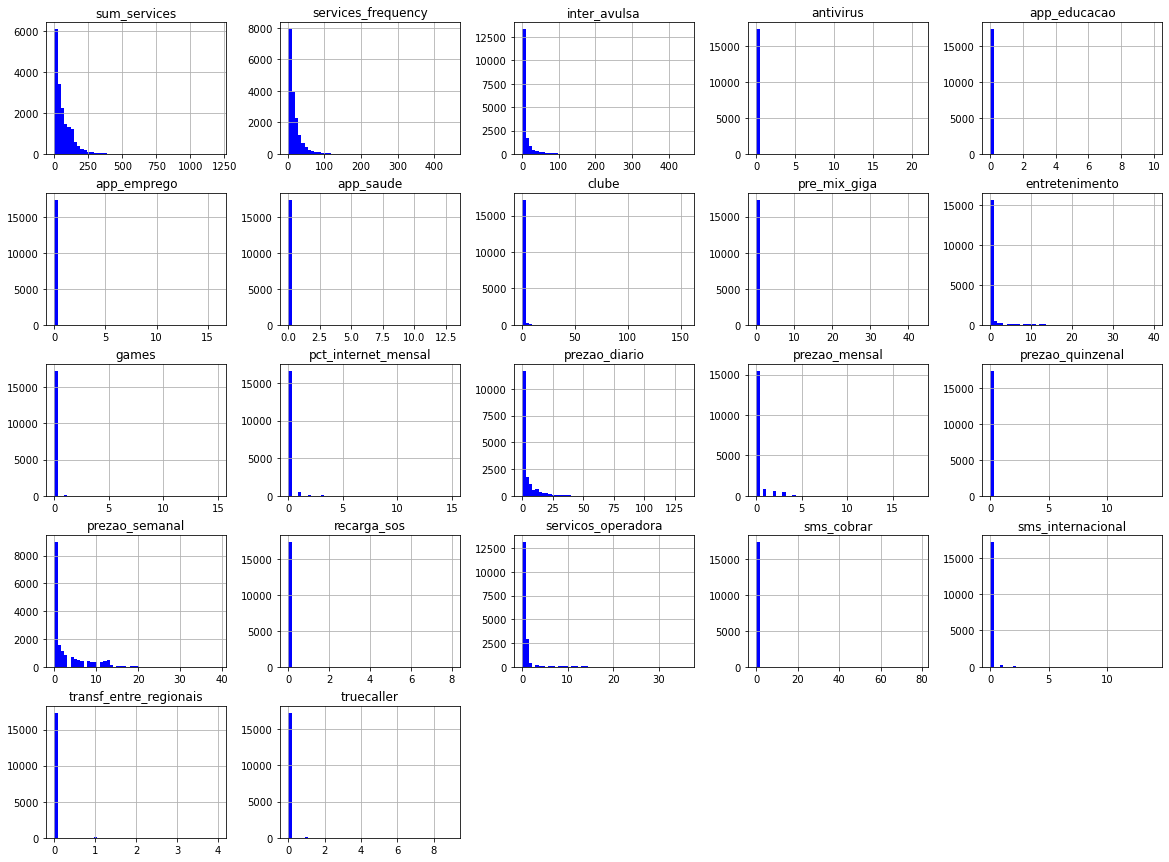

In [13]:
# Visualização da distribuição das variáveis de serviços
data.loc[:, ['sum_services', 'services_frequency',
             'inter_avulsa', 'antivirus', 'app_educacao', 'app_emprego', 'app_saude',
             'clube', 'pre_mix_giga', 'entretenimento', 'games',
             'pct_internet_mensal', 'prezao_diario', 'prezao_mensal',
             'prezao_quinzenal', 'prezao_semanal', 'recarga_sos',
             'servicos_operadora', 'sms_cobrar', 'sms_internacional',
             'transf_entre_regionais', 'truecaller']].hist (bins=50, figsize=(20,15), color="blue")
plt.show

* Podemos observar que as variáveis de serviços não estão na distribuição normal, tendo assim uma distribuição assimétrica à direita e a forma mais correta para tratar os valores ausentes, será eliminando as linhas é, eliminando as linhas, dado que o enriquecimento das serviços são voltados para os Leads que utilizam os pacotes.

* Drop id único dos Leads

In [14]:
# Drop
to_drop=['id_contact']
data.drop(to_drop, axis=1, inplace=True)

* Tratando valores ausentes

In [15]:
# Tratando os valores ausentes
data.dropna(inplace=True)

* Tratando variáveis categoricos

In [16]:
data.select_dtypes(include='object')

,regional,plan_type
0,BASE,CONTROLE
13,SP,PRE PAGO
14,RJES,PRE PAGO
17,SP,CONTROLE
19,RJES,PRE PAGO
...,...,...
53242,SP,PRE PAGO
53250,NE,PRE PAGO
53253,SP,CONTROLE
53254,SP,PRE PAGO


In [17]:
# Transformar rótulos não numéricos (desde que sejam laváveis e comparáveis) em rótulos numéricos.
var_cat=data.select_dtypes('object')
for col in var_cat:
    data[col] = LabelEncoder().fit_transform(data[col].astype('str'))

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16376 entries, 0 to 53256
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regional                16376 non-null  int32  
 1   idade_cliente           16376 non-null  int64  
 2   plan_type               16376 non-null  int32  
 3   Qnt_abandono            16376 non-null  float64
 4   sum_recharge            16376 non-null  float64
 5   recharge_frequency      16376 non-null  float64
 6   rec_online_10           16376 non-null  float64
 7   rec_online_35_b5        16376 non-null  float64
 8   rec_online_15           16376 non-null  float64
 9   sos_rec_5               16376 non-null  float64
 10  rec_online_20_b2        16376 non-null  float64
 11  chip_pre_rec_10         16376 non-null  float64
 12  chip_pre_rec_20         16376 non-null  float64
 13  rec_online_13           16376 non-null  float64
 14  rec_online_50_b8        16376 non-null

* Gerando .csv para análise e exploração dos dados

In [19]:
# Get .csv
data.to_csv('data_aed.csv', sep=';', index=False)